In [1]:
import numpy as np
import pandas as pd
import random
import sys,itertools
import matplotlib.pyplot as plt
import scipy.stats

import copy

from scipy.stats import multivariate_normal

from sklearn.datasets import load_digits

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from Fisher import Fisher

from sklearn.metrics import classification_report

# Demo 1. digits data

Load and divide data

In [7]:
digits = load_digits()
x = digits.data
y = digits.target
im = digits.images

train_split = int(x.shape[0]*0.8)
x_train = x[:train_split]
y_train = y[:train_split]
x_test = x[train_split:]
y_test = y[train_split:]

train Fisher classifier 1D

-------------------------------
Fit process summary:
-------------------------------
The within-class covariance matrix does not have full rank
Sw shape:(64, 64), Sw rank:61
-------------------------------


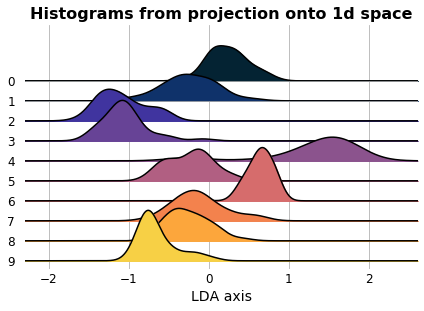

In [8]:
f1 = Fisher()

f1.fit(x_train, y_train)

f1.plot_joypy_1d(x_test, y_test)

x_pred1 = f1.predict(x_test)

train Fisher classifier 2D

-------------------------------
Fit process summary:
-------------------------------
The within-class covariance matrix does not have full rank
Sw shape:(64, 64), Sw rank:61
-------------------------------


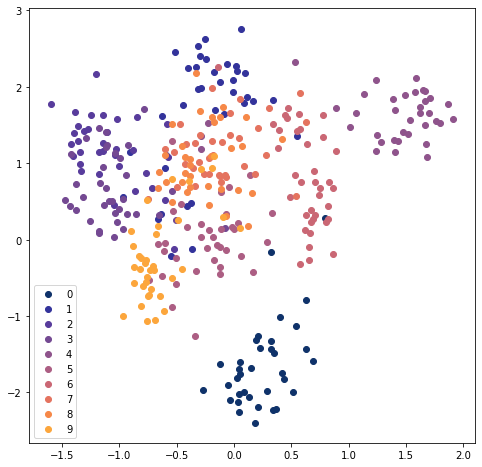

In [5]:
f2 = Fisher(num_dims=2)

f2.fit(x_train, y_train)

f2.plot_proj_2d(x_test, y_test)

x_pred2 = f2.predict(x_test)

train Fisher classifier 3D

-------------------------------
Fit process summary:
-------------------------------
The within-class covariance matrix does not have full rank
Sw shape:(64, 64), Sw rank:61
-------------------------------


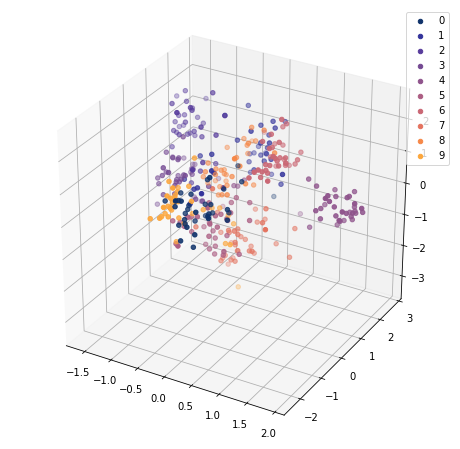

In [6]:
f3 = Fisher(num_dims=3)

f3.fit(x_train, y_train)

f3.plot_proj_3d(x_test, y_test)

x_pred3 = f3.predict(x_test)


Compare classification results of projection onto different dimensions

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

conf1d = confusion_matrix(y_test, x_pred1)
conf2d = confusion_matrix(y_test, x_pred2)
conf3d = confusion_matrix(y_test, x_pred3)

print('confusion matrices:')
print(f'1d: \n{conf1d}')
print()
print(f'2d: \n{conf2d}')
print()
print(f'3d: \n{conf3d}')

print('-----------------------')
print('classification reports')
c1d = classification_report(y_test, x_pred1)
c2d = classification_report(y_test, x_pred2)
c3d = classification_report(y_test, x_pred3)

print(f'2d: \n{c1d}')
print()
print(f'2d: \n{c2d}')
print()
print(f'3d: \n{c3d}')


confusion matrices:
1d: 
[[23  4  0  0  0  0  8  0  0  0]
 [10 11  0  2  0  0  1  0  8  4]
 [ 0  0 16 12  0  0  0  0  2  5]
 [ 0  1 12 20  0  0  0  0  2  2]
 [ 0  3  0  0 32  0  2  0  0  0]
 [ 8 15  0  0  0  0  0  0  9  5]
 [ 3  1  0  0  0  0 33  0  0  0]
 [ 7 16  0  0  0  0  3  0  8  2]
 [ 5 11  0  0  0  0  1  0 12  4]
 [ 1  4  0  7  0  0  0  0  5 20]]

2d: 
[[33  0  0  0  0  0  2  0  0  0]
 [ 0 25  1  1  0  2  1  0  3  3]
 [ 0  0 26  2  0  1  0  0  6  0]
 [ 0  0 14 19  0  1  0  0  1  2]
 [ 0  0  0  0 34  0  0  3  0  0]
 [ 1  0  0  0  0 22  2  3  1  8]
 [ 0  1  0  0  6  0 30  0  0  0]
 [ 0  4  0  1  2  0  3 18  8  0]
 [ 0  7  0  0  0  2  2  6 15  1]
 [ 0  0  0  3  0  3  0  3  2 26]]

3d: 
[[33  0  0  0  0  0  2  0  0  0]
 [ 0 24  2  1  2  1  0  0  3  3]
 [ 0  0 29  1  0  0  0  0  5  0]
 [ 0  1  6 25  0  1  0  1  1  2]
 [ 0  2  0  0 34  0  0  0  1  0]
 [ 0  1  0  0  0 31  0  1  0  4]
 [ 0  2  0  0  2  0 33  0  0  0]
 [ 0  0  0  0  2  1  0 32  1  0]
 [ 0  9  0  0  0  2  4  0 17  1]
 [ 0